In [1]:
##Import essential libraries
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type

In [2]:
df = pd.read_csv('App_Users_Data.csv')

In [3]:
df.head(2)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0


In [4]:
df.shape

(50000, 12)

<b>About dataset

As you can see in fineTech_appData DataFrame, there are 50,000 users data with 12 different features. Let’s know each and every feature in brief.

1. user: Unique ID for each user.

2. first_open: Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.

3. dayofweek: On which day user logon.
    
    0: Sunday
1: Monday
2: Tuesday
3: Wednesday
4: Thursday
5: Friday
6: Saturday
 
4. Hour: Time of a day in 24-hour format customer logon. It is correlated with dayofweek column.

5. age: The age of the registered user.

6. screen_list: The name of multiple screens seen by customers, which are separated by a comma.

7. numscreens: The total number of screens seen by customers.

8. minigame: Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.

9. used_premium_feature: If the customer used the premium feature of the app then 1 otherwise 0.

10. enrolled: If the user bought a premium feature app then 1 otherwise 0.

11. enrolled_date: On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features app.

12. liked: The each screen of the app has a like button if the customer likes it then 1 otherwise 0.

### EDA

In [5]:
#Find the null value in DataFrame using DataFrame.isnull() method and take summation by sum() method.
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

All columns contain 0 null value except enrolled_date. The enrolled_date column has total 18926 null values.

Take brief information about the dataset using DataFrame.info() method.

In [6]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


We can see in the output provided by DataFrame.info() method, there are 50,000 entries (rows) from 0 to 49999 and a total of 12 columns.

All columns have 50,000 non-null values except enrolled_date. It has 31,074 non-null. There is a total of 8 columns that contain integer 64 bit (int64) values and the remaining 4 are object type.

The size of fineTech_appData DataFrame is 4.6 MB.

To know how the numeric variable distributed, we used DataFrame.describe() method. It gives total number count, mean value, std (standard deviation), min and max value, and values are below 25%, 50%, 75% of each column.

- Here we can see that average age of user is around 32.
- On an average, user visits 21 screens, also 10% of user plays minigame, 16% of users liked features of app, 17% of user used premium features of app & 62% enrolled to premium.

In [7]:
# Let's convert the hour column into the integer format
df['hour'] = df.hour.str.slice(1,3).astype(int)

In [8]:
df.head(3)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1


In [9]:
# get data type of each columns
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [10]:
# To plot, lets create dataframe with only numerical columns
df1 = df.copy().drop(columns=['user','first_open','screen_list','enrolled_date','enrolled'])

In [11]:
df1.head(1)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0


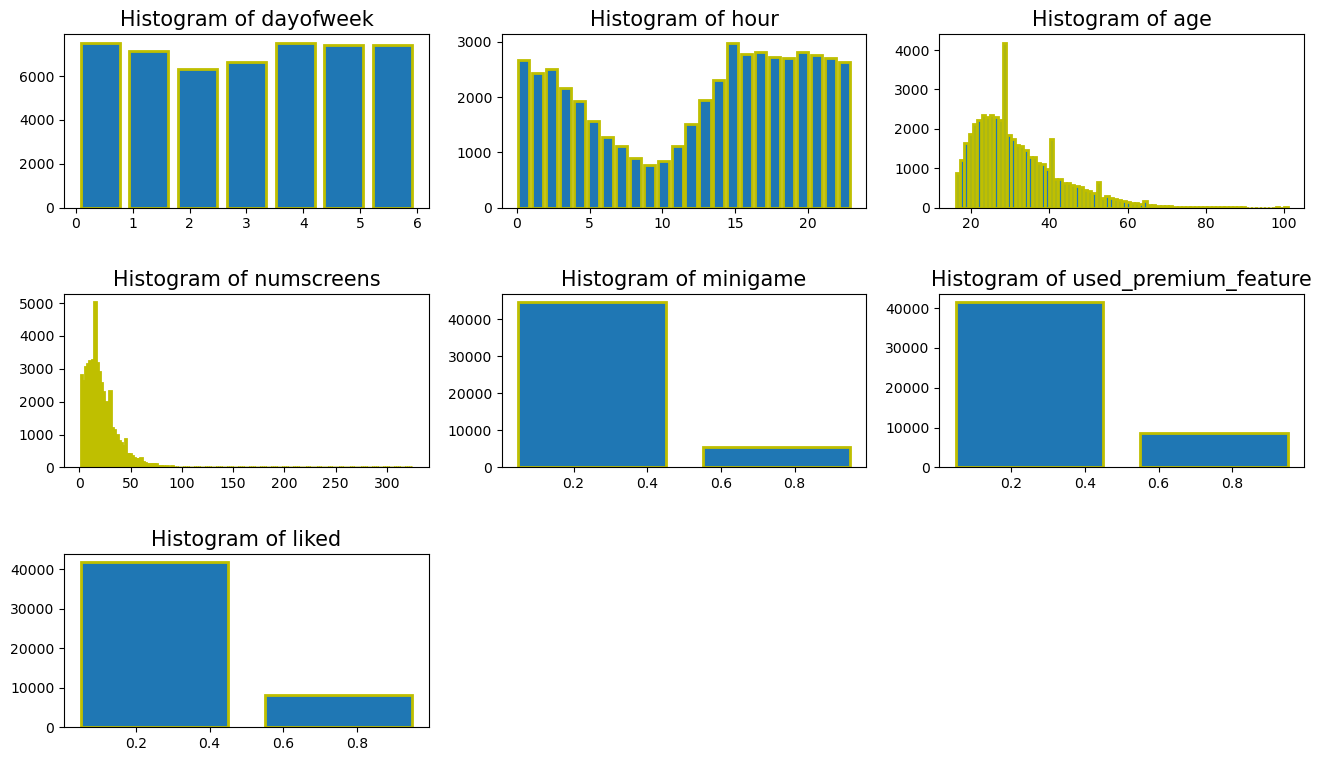

In [12]:
# Let's Plot Histogram for all numerical columns to know the disribution of these features
plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = df1.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
     
    bins = len(df1[j].unique()) # bins for histogram
    plt.hist(df1[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
     
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots)

Observations:

- Most of the users join app during weekends
- Most of the users 1st open the app around 15 that is around 3PM
- Most of users are aged around 30 Years
- Most of users visited around 20 screens of app
- Not many users played any minigames
- Not many users press the like button
- Not many user used premium feature in 1st 24 hours

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

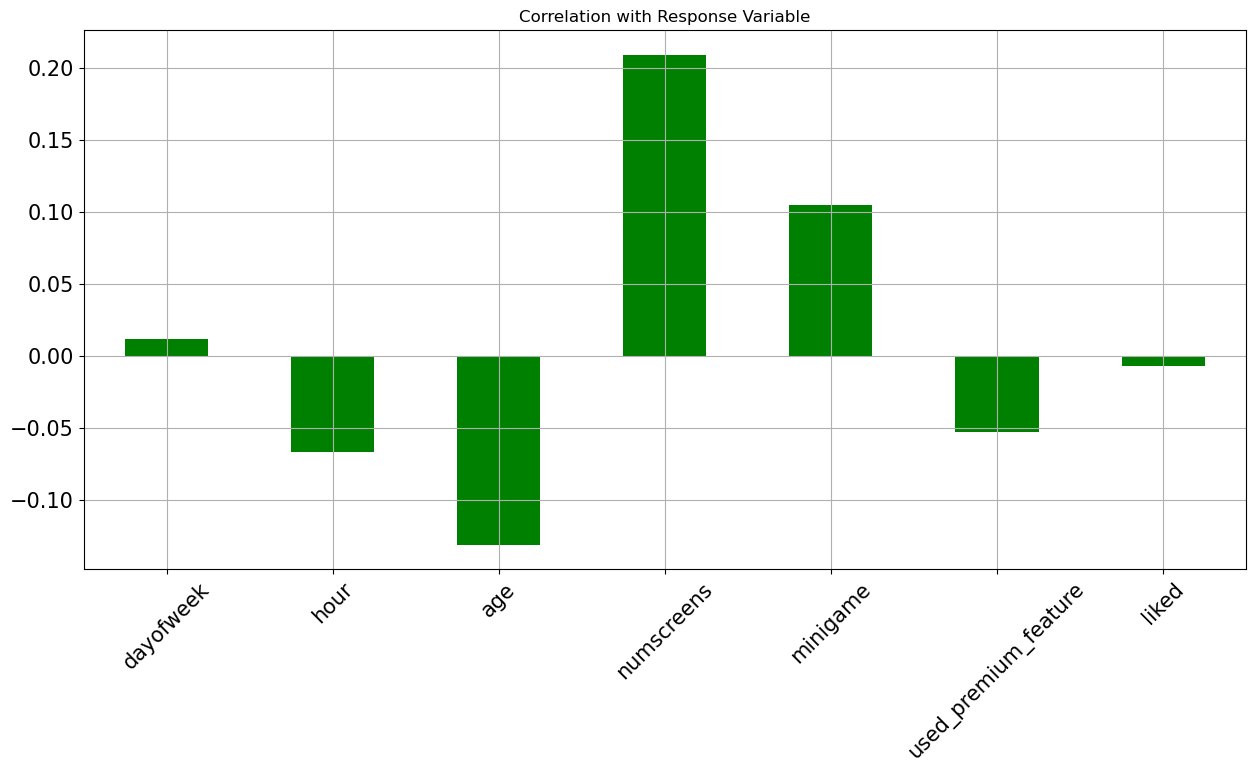

In [13]:
# Let's see the correlation between independent features & response variable
df1.corrwith(df.enrolled).plot.bar(figsize=(15,7),title='Correlation with Response Variable',
                                   fontsize=15, rot=45, grid=True, color='Green')

<b>Observarions:

- Dayofweek is least positively correlated & says that if you join the app in day 0(sunday) then their is most likely to get enrolled to the premium features
- Hour is negatively correlated with target variable shows the earlier the hour(in night) the most likely to get enrolled
- Age is also negatively correlated reflects that the younger users are most likely to get enrolled
- Numscreen is positively correlated with target shows that more the no. of screen user visits more chances of getting enrolled
- Minigame also shows that more the minigame user play more chances of getting enrolled
- Liked is very least negative which does not have much impact in target
- Interestingly used_premium_feature is negatively correlated with response meaning that if user used the premium feature in 1st 24 hour that he/she might not enroll after the trial version of premium features

<AxesSubplot:>

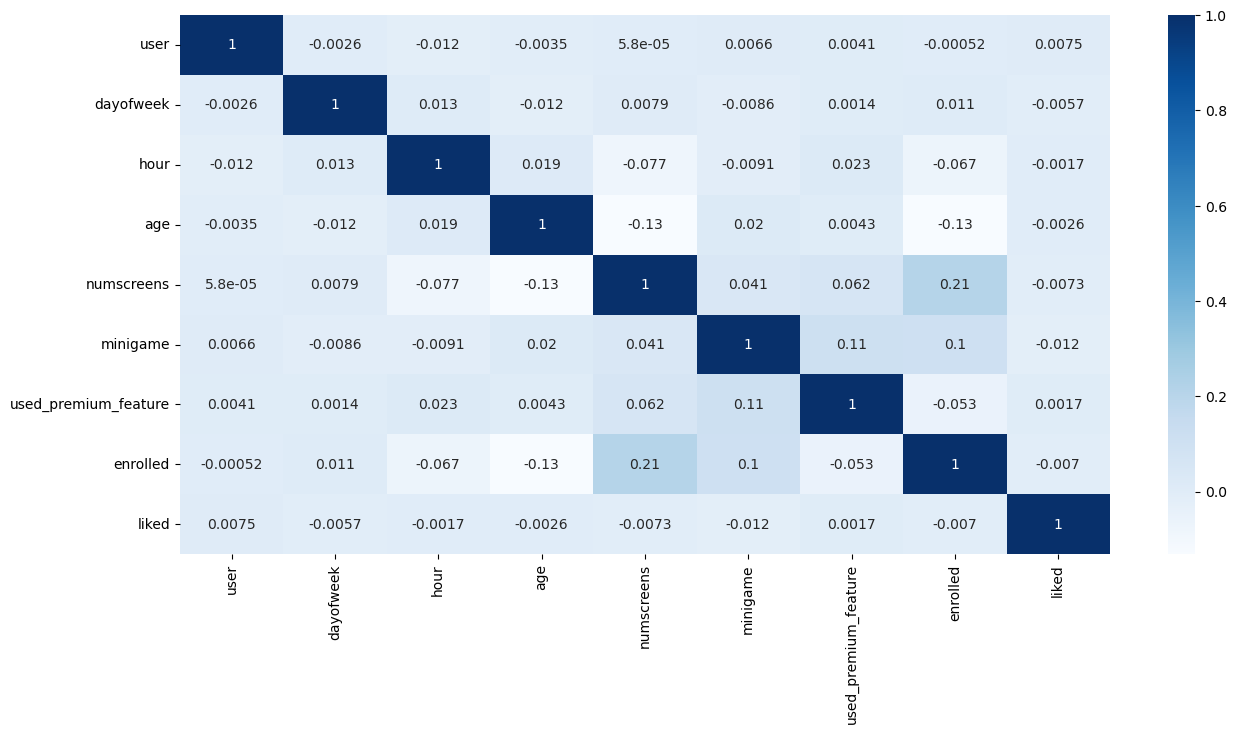

In [14]:
# Let's see the correlation matrix to see the relation between all the feature in the dataset, also can see the linear relation
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

All the independent features are having very less correlation among themselves, so their is very less chance of multicollinearity problem

## Feature Engineering - Response variable

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int32 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [16]:
# converting date column into std python date formate
df['first_open'] = pd.to_datetime(df['first_open'])
df['enrolled_date'] = pd.to_datetime(df['enrolled_date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  50000 non-null  int64         
 1   first_open            50000 non-null  datetime64[ns]
 2   dayofweek             50000 non-null  int64         
 3   hour                  50000 non-null  int32         
 4   age                   50000 non-null  int64         
 5   screen_list           50000 non-null  object        
 6   numscreens            50000 non-null  int64         
 7   minigame              50000 non-null  int64         
 8   used_premium_feature  50000 non-null  int64         
 9   enrolled              50000 non-null  int64         
 10  enrolled_date         31074 non-null  datetime64[ns]
 11  liked                 50000 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(8), object(1)
memory usage: 4.4+ MB


In [18]:
# We are finding how much time the customer takes to get enrolled in the premium feature app after registration.
# Let's create a new feature of difference between dates in hours to find the cut-off for enrolled
df['Date_Delta_in_Hour'] = (df.enrolled_date-df.first_open).abs().astype('timedelta64[h]')

In [19]:
df.Date_Delta_in_Hour[df.Date_Delta_in_Hour<0]

Series([], Name: Date_Delta_in_Hour, dtype: float64)

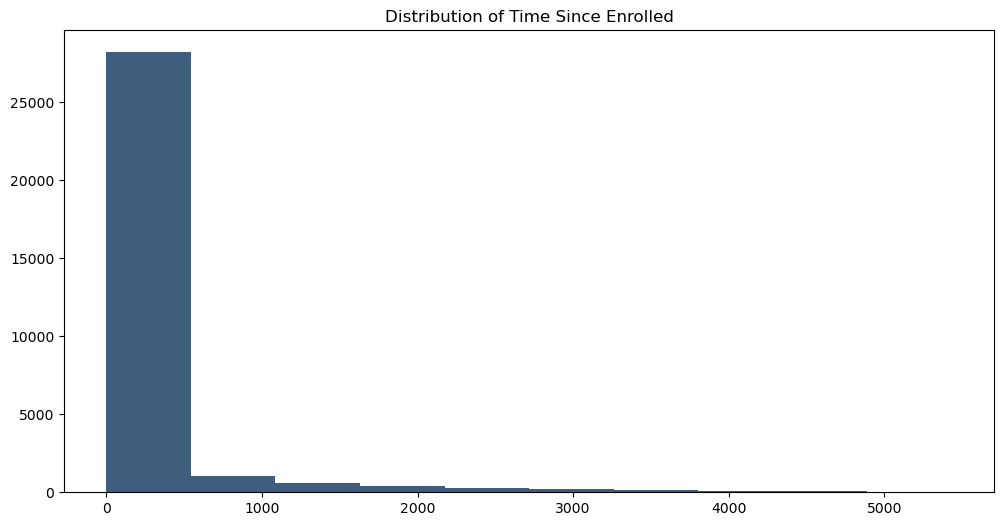

In [20]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#3F5D7D')
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 2000 Hour but their might be case that most enrollment is in 1st 100 or 500 hours, lets zoom the plot

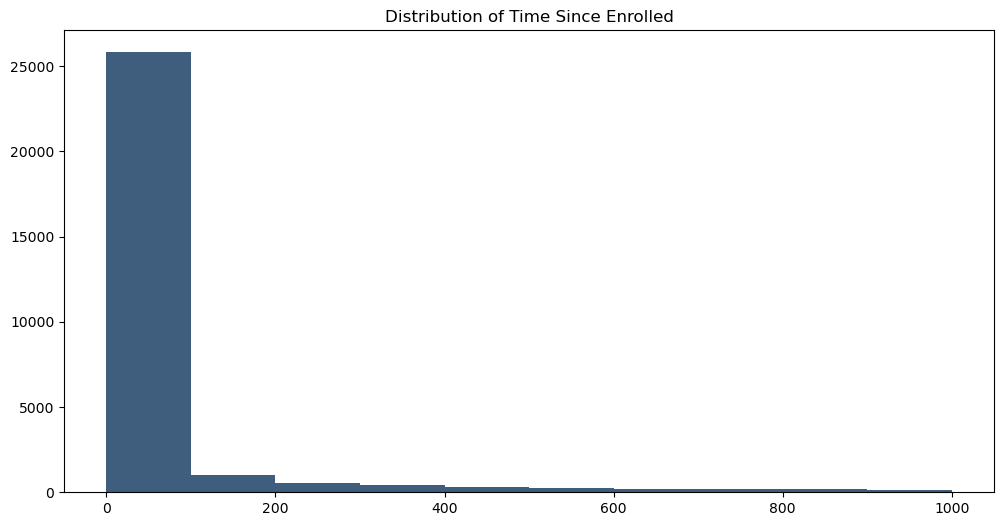

In [21]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#3F5D7D', range=[0,1000])
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 100 Hour but let's zoom the plot again

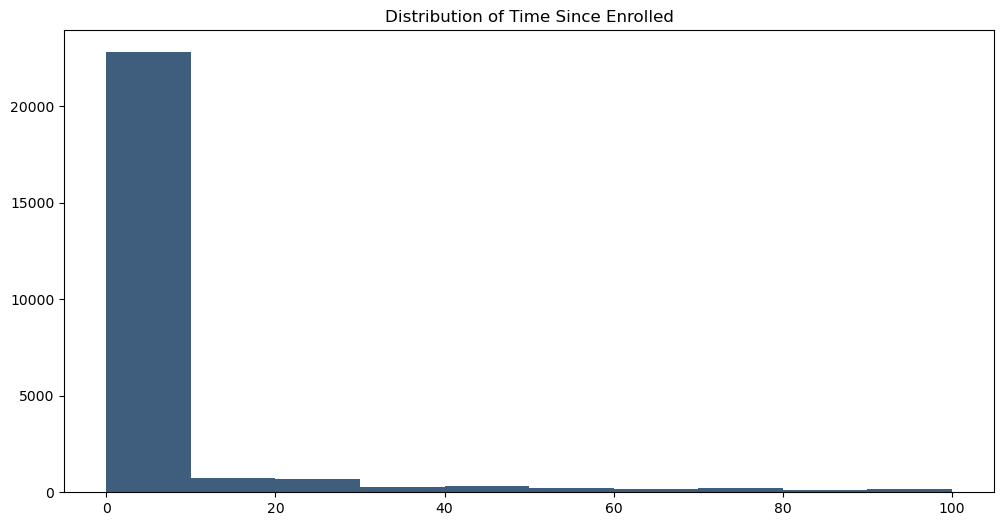

In [22]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#3F5D7D', range=[0,100])
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 10 Hour but let's zoom the plot a bit more

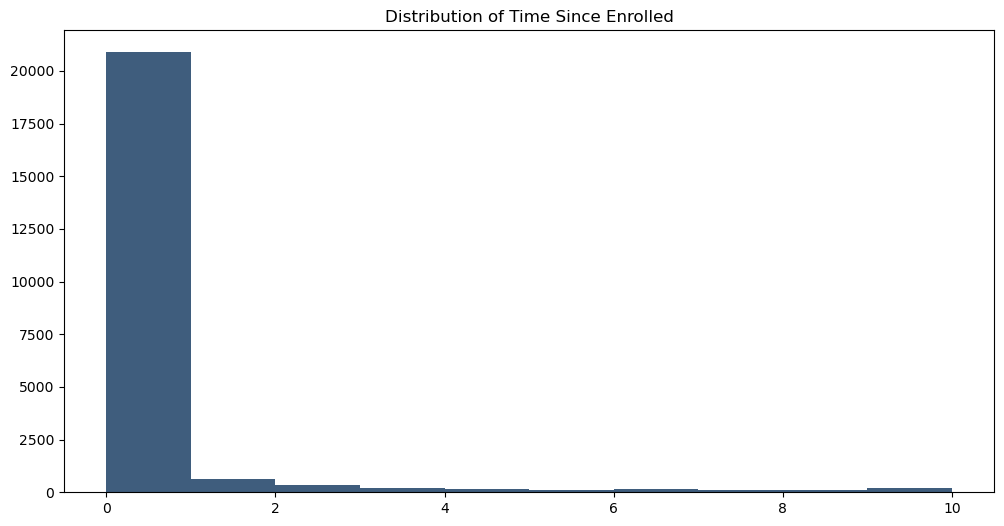

In [23]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#3F5D7D', range=[0,10])
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 1 Hour but let's zoom the plot one more time

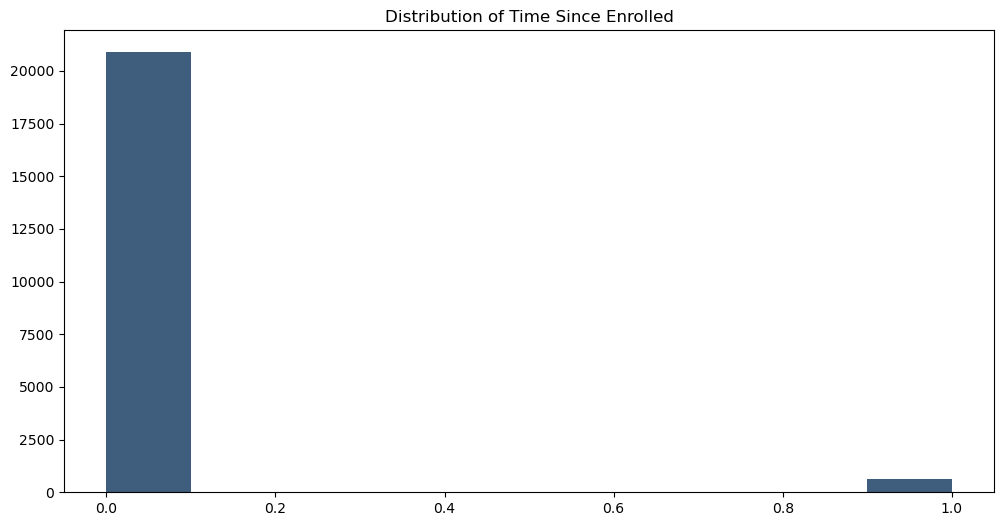

In [24]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#3F5D7D', range=[0,1])
plt.title('Distribution of Time Since Enrolled')
plt.show()

#### Here we conclude that most of users (more that 20000 out-off total 50000 users) do not used the 1st 24 hour premium free trial & infact they direcly jumped to the premium at the time of they 1st open the app

We choose cut-off as 48 hours that is whoever difference is less than 48 is classified as enrolled else not

In [25]:
df.loc[df.Date_Delta_in_Hour>48, 'enrolled'] = 0

In [26]:
df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,Date_Delta_in_Hour
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,0.0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0,NaN
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaN
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,0.0


In [27]:
df.drop(columns=['first_open','enrolled_date','Date_Delta_in_Hour'],inplace=True)

In [35]:
# read csv file and convert it into numpy array
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens


array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [36]:
#Add ‘,’ at the end of each string of ‘screen_list’ for further operation.
df['screen_list'] = df.screen_list.astype('str') + ','

The ‘Screen_list’ contains string values but we can’t use it directly. So to solve this problem we are taking each screen name from ‘top_screens’ and append as a column by the same name to ‘screen_list’. Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.

In [37]:
# string into to number
 
for screen_name in top_screens:
    df[screen_name] = df.screen_list.str.contains(screen_name).astype(int)
    df['screen_list'] = df.screen_list.str.replace(screen_name+",", "")


In [38]:
# get shape
df.shape

(50000, 68)

You can see the shape of the dataset has changed from 12 to 68 columns.

In [39]:
# head of DataFrame
df.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,",",3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Those screens are not availble in ‘top_screens’ that are counted and conted number store in new column by name ‘remain_screen_list’.

In [41]:
# remain screen in 'screen_list'
df.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,,'

In [43]:
# count remain screen list and store counted number in 'remain_screen_list'
 
df['remain_screen_list'] = df.screen_list.str.count(",")

Droping ‘screen_list’ column.

In [44]:
# Drop the 'screen_list'
df.drop(columns = ['screen_list'], inplace=True)

In [46]:
# total columns
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

All the saving screens correlated with each other that’s we are taking the sum of all saving screens in each row and store in a single row for all customers.



In [47]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
df['saving_screens_count'] = df[saving_screens].sum(axis = 1)
df.drop(columns = saving_screens, inplace = True)

similarly for credit, CC1 and loan screens.


In [49]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
df['credit_screens_count'] = df[credit_screens].sum(axis = 1)
df.drop(columns = credit_screens, axis = 1, inplace = True)

In [50]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
df['cc_screens_count'] = df[cc_screens].sum(axis = 1)
df.drop(columns = cc_screens, inplace = True)

In [51]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
df['loan_screens_count'] = df[loan_screens].sum(axis = 1)
df.drop(columns = loan_screens, inplace = True)

Now, you can see the shape of DataFrame is reduced.



In [52]:
df.shape

(50000, 50)

See information of dataframe


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [55]:
# Numerical distribution of fineTech_appData
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,...,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.0,50000.000000,50000.0,50000.00000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.0,...,0.0,0.0,0.0,0.0,0.0,7.211700,0.0,0.007980,0.0,0.10342
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.0,...,0.0,0.0,0.0,0.0,0.0,3.674996,0.0,0.088975,0.0,0.30451
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,0.000000,0.0,0.00000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.000000,0.0,0.00000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.000000,0.0,0.00000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,36.000000,0.0,1.000000,0.0,1.00000


### Heatmap with the correlation matrix

<AxesSubplot:>

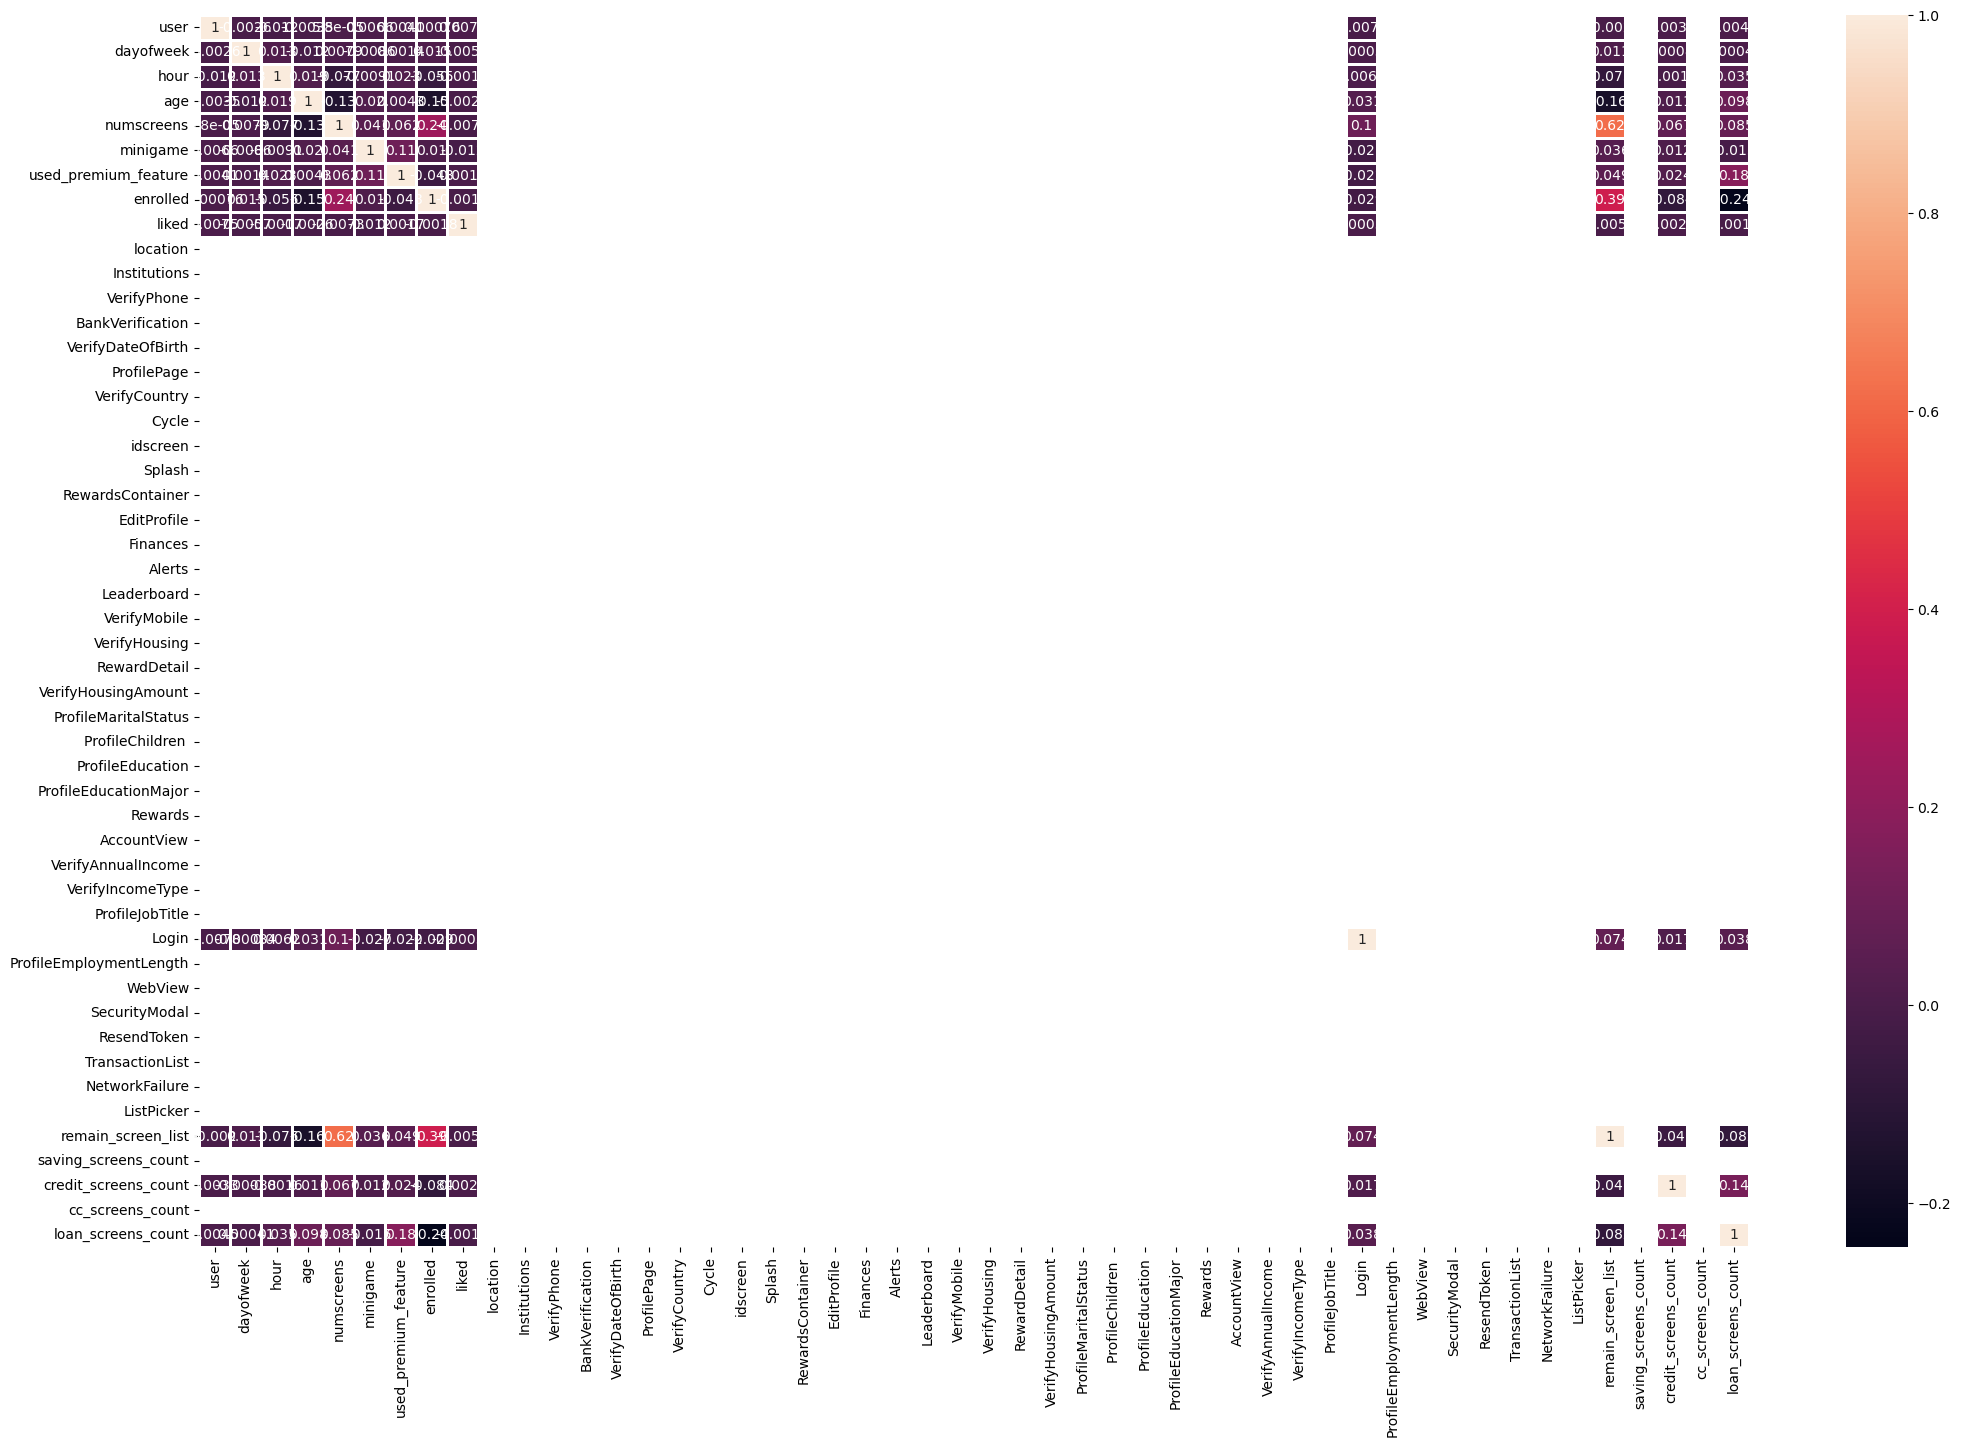

In [57]:
# Heatmap with correlation matrix of new fineTech_appData
 
plt.figure(figsize = (25,16)) 
sns.heatmap(df.corr(), annot = True, linewidth =2)

### Data preprocessing

In [58]:
Split dataset in Train and Test
df_clean = df
target = df['enrolled']
df.drop(columns = 'enrolled', inplace = True)

SyntaxError: invalid syntax (1665786153.py, line 1)

## Data Preprocessing & Feature Scaling

### Logistic Regression Model

### Model Training

#### Predictions